In [1]:
import numpy as np
from networks import *
from simulation import *
from simulation.differential_equations import DifferentialEquations


In [3]:
networks_to_test = [('eq', 'Capitale Eq. Campo Medio con Runge-Kutta'), (lambda: ErNetwork.load_json('my_networks/er1.json'), 'Capitale Rete ER'),  (lambda: BaNetwork.load_json('my_networks/ba1.json'), 'Capitale Rete BA'), (lambda: WsNetwork.load_json('my_networks/ws1.json'), 'Capitale Rete WS')]

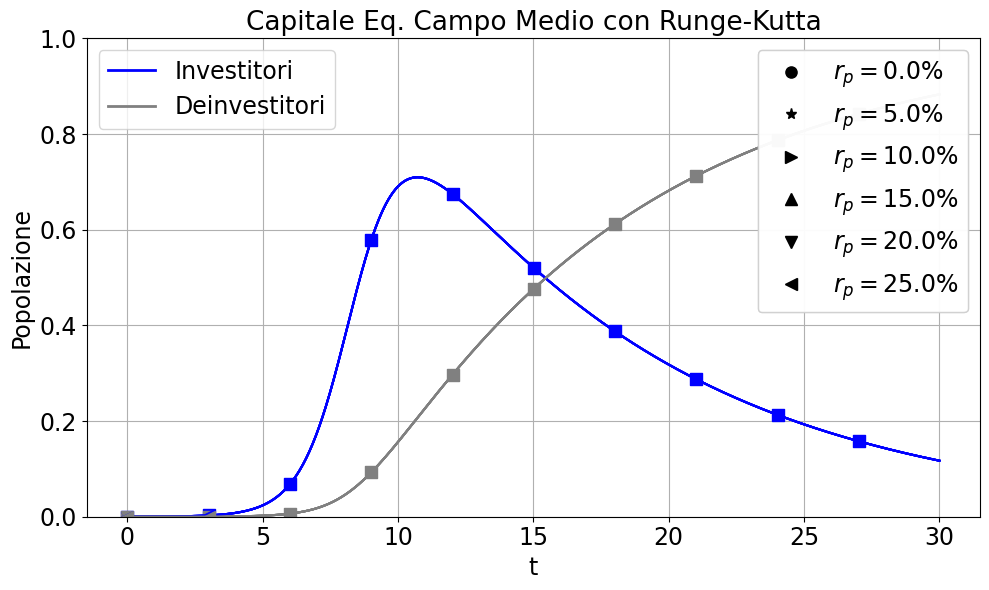

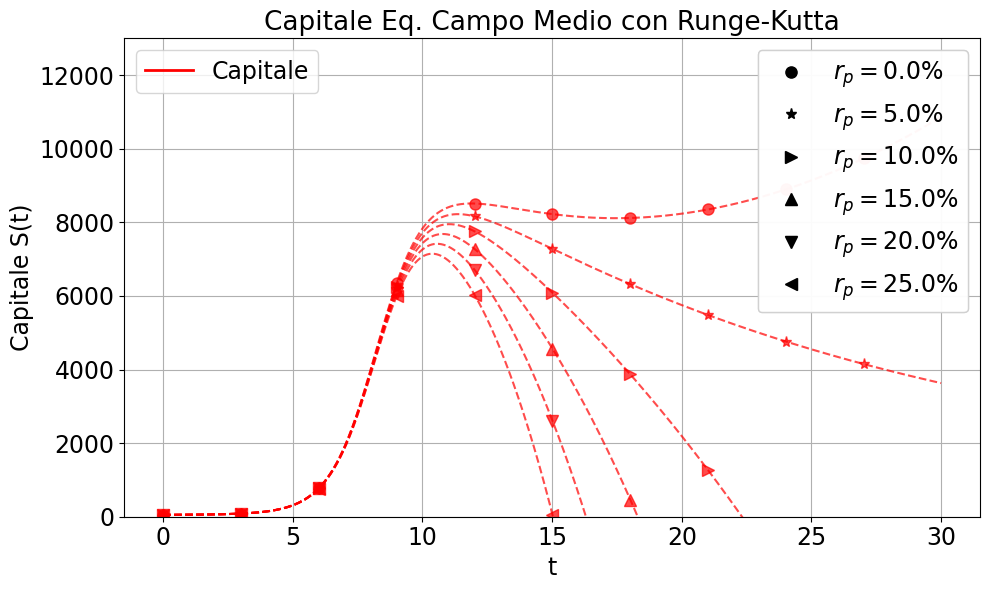

Network caricato da my_networks/er1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/er1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/er1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.5

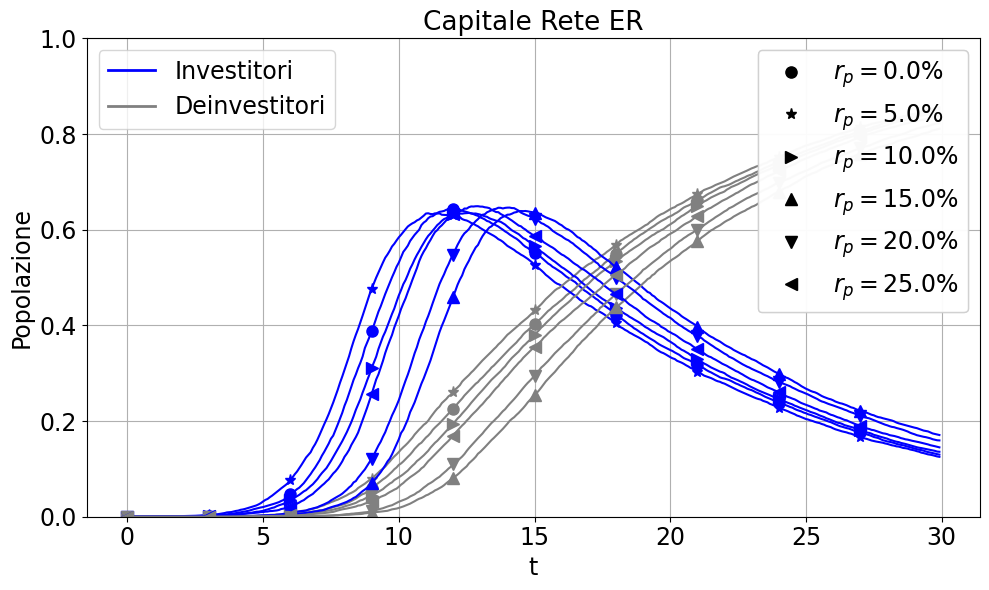

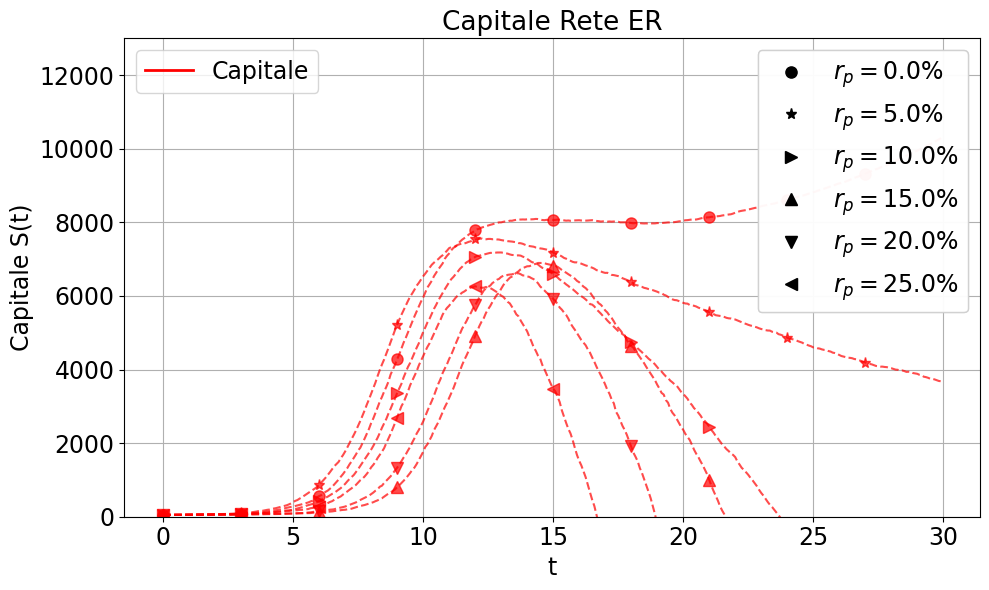

Network caricato da my_networks/ba1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/ba1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/ba1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.5

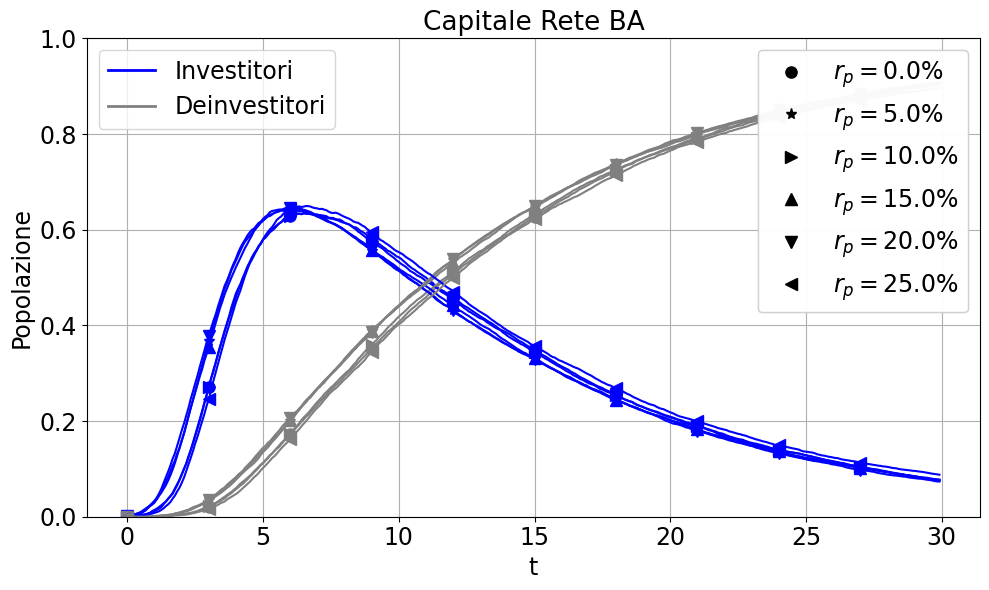

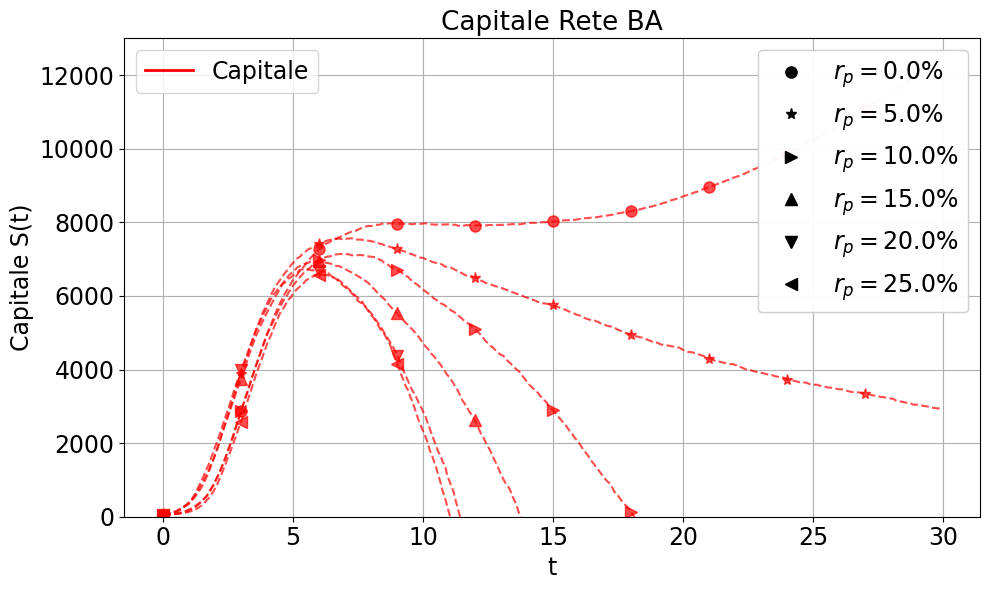

Network caricato da my_networks/ws1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/ws1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete
91.39% complete
96.39% complete
Network caricato da my_networks/ws1.json
Starting simulation
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.5

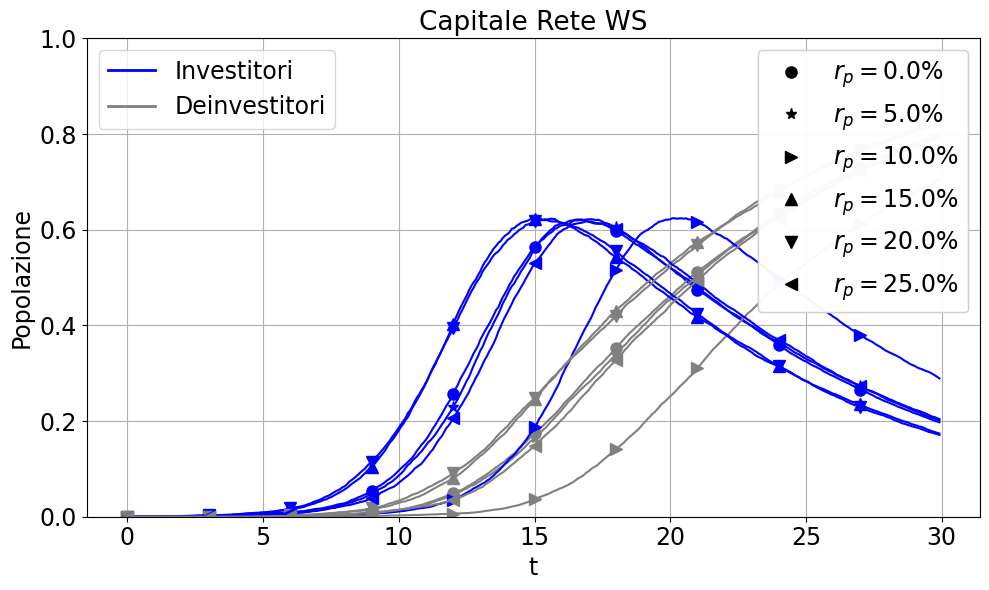

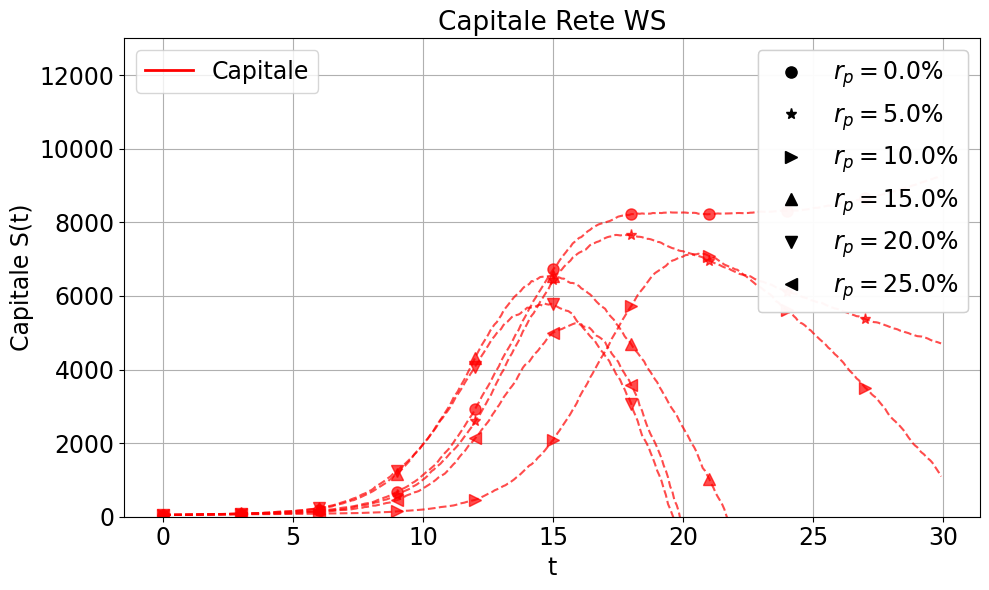

In [4]:
i = 0
for create_network, lbl in networks_to_test:
    plotter = PonziPlotter()
    for rp in [0., 0.05, 0.1, 0.15, 0.2, 0.25]:
        par = PonziParameters(M=1, starting_capital=50, lambda_ = lambda t: 0.2, mu=lambda t:0.1, rp= lambda t: rp, rr=lambda t: 0.05)
        if create_network == 'eq':
            equations = DifferentialEquations(N=10000, ponzi_parameters=par, avg_k=6)
            res = equations.solve(0, 30, 1000)
        else:
            net = create_network() # carica la rete
            sim = PonziSimulation(net, par, max_time_units=30 * 12)
            res = sim.simulate_ponzi()
        plotter.add_simulation(res, r'$r_p=' + str(rp*100) + '\\%$')
    plotter.plot(f'rp/rp_{i}_investors', lbl, show_investor=True, show_deinvestor=True)
    plotter.plot(f'rp/rp_{i}_capital', lbl, show_capital=True, max_capital=13000)
    i+= 1
